In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math

LAPLACIAN_PATH = '../images/expt_8/moon.tif'

def readImage(imagePath, imageName):
    # read the image
    image_original = mpimg.imread(imagePath)
    image = image_original.copy() # else it is read only

    if len(image.shape) == 3:
        # is a color image
        # converting to grayscale: avg method
        R = image[:,:, 0]
        G = image[:,:, 1]
        B = image[:,:, 2]
        grayscale = (R/3 + G/3 + B/3)
    else:
        # is a grayscale image
        grayscale = np.array(image_original.copy())

    plt.imshow(grayscale, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Original ' + imageName)
    
    return grayscale


def filterImage(grayImage, imageFilter, filterName):

    # Filtering

    # take input from user
    # n -> filter size
    # filt -> filter kernel

    filt = imageFilter
    n = filt.shape[0]


    # constructing deviation from centre matrix
    # n -> filter size
    deviations = []
    for i in range(n):
        dev_row = []
        for j in range(n):
            elem = ( j - n//2, i - n//2)
            dev_row.append(elem)

        deviations.append(dev_row)


    # initialize result to store image
    result = np.zeros(grayImage.shape)



    # filtering logic using deviation mask
    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            filter_prod = 0

            for k in range(n):
                for m in range(n):

                    x_shift = deviations[k][m][0]
                    y_shift = deviations[k][m][1]

                    x_index = i + y_shift  
                    y_index = j + x_shift

                    if (x_index < 0 or x_index >= grayImage.shape[0] or y_index < 0 or y_index >= grayImage.shape[1]):
                        continue

                    t = grayImage[i + y_shift, j + x_shift]
                    filter_prod = filter_prod + ( filt[k][m] * t )

            result[i, j] =  filter_prod

    plt.imshow(result, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Filtered Image Using ' + filterName)

    return result



def displayImage(image, imageName):
    plt.imshow(image, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title(imageName)
    
    
    
def generateGaussianFilter(size, sigma):
    
    #initialize
    result = np.zeros((size, size))
    
    center = size // 2
    
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            
            factor = -( x**2 + y**2) / (2 * (sigma**2))
            
            result[i, j] = 100 * math.exp(factor)
   
    print(result)
    
    
    

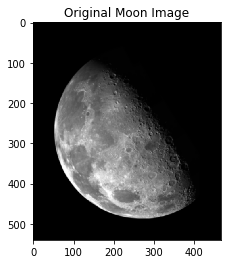

In [6]:
img1 = readImage(LAPLACIAN_PATH, 'Moon Image')

In [7]:
# laplacian filter
laplacian = np.array([
    [0, 1, 0],
    [1,-4, 1],
    [0, 1, 0]   
])

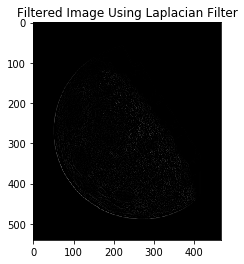

In [8]:
c = filterImage(img1, laplacian, 'Laplacian Filter')

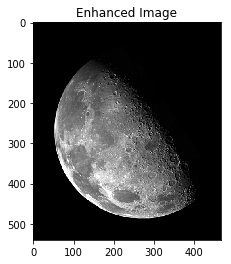

In [10]:
displayImage(img1 - c, 'Enhanced Image')

In [4]:
math.exp(1)

2.718281828459045

In [3]:
2.732**2


7.463824000000002

In [5]:
2.718281828459045**2

7.3890560989306495

In [6]:
2**2

4

In [14]:
generateGaussianFilter(9, 1.4)

[[2.84930489e-02 1.69927937e-01 6.08431691e-01 1.30791660e+00
  1.68798841e+00 1.30791660e+00 6.08431691e-01 1.69927937e-01
  2.84930489e-02]
 [1.69927937e-01 1.01342274e+00 3.62858823e+00 7.80020315e+00
  1.00668900e+01 7.80020315e+00 3.62858823e+00 1.01342274e+00
  1.69927937e-01]
 [6.08431691e-01 3.62858823e+00 1.29922608e+01 2.79288438e+01
  3.60447789e+01 2.79288438e+01 1.29922608e+01 3.62858823e+00
  6.08431691e-01]
 [1.30791660e+00 7.80020315e+00 2.79288438e+01 6.00373041e+01
  7.74837429e+01 6.00373041e+01 2.79288438e+01 7.80020315e+00
  1.30791660e+00]
 [1.68798841e+00 1.00668900e+01 3.60447789e+01 7.74837429e+01
  1.00000000e+02 7.74837429e+01 3.60447789e+01 1.00668900e+01
  1.68798841e+00]
 [1.30791660e+00 7.80020315e+00 2.79288438e+01 6.00373041e+01
  7.74837429e+01 6.00373041e+01 2.79288438e+01 7.80020315e+00
  1.30791660e+00]
 [6.08431691e-01 3.62858823e+00 1.29922608e+01 2.79288438e+01
  3.60447789e+01 2.79288438e+01 1.29922608e+01 3.62858823e+00
  6.08431691e-01]
 [1.69